In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df = pd.read_csv('genres_v2.csv')
df.head()

<ipython-input-2-101425042a04>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('genres_v2.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [ ]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [ ]:
df[df['song_name'].isnull()]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
18597,0.714,0.821,6,-7.635,1,0.1760,0.041000,0.000000,0.1160,0.649,...,69gRFGOWY9OMpFJgFol1u0,spotify:track:69gRFGOWY9OMpFJgFol1u0,https://api.spotify.com/v1/tracks/69gRFGOWY9OM...,https://api.spotify.com/v1/audio-analysis/69gR...,282707,4,Hiphop,NaN,NaN,NaN
19677,0.811,0.445,8,-10.105,1,0.2740,0.045300,0.000000,0.1090,0.250,...,13q8un4Xjs3IOfdem4jgVe,spotify:track:13q8un4Xjs3IOfdem4jgVe,https://api.spotify.com/v1/tracks/13q8un4Xjs3I...,https://api.spotify.com/v1/audio-analysis/13q8...,154082,4,Hiphop,NaN,NaN,NaN
19678,0.763,0.654,11,-9.423,0,0.5060,0.087500,0.000003,0.1390,0.277,...,7B2NTZXEPeshkufbqT1gMN,spotify:track:7B2NTZXEPeshkufbqT1gMN,https://api.spotify.com/v1/tracks/7B2NTZXEPesh...,https://api.spotify.com/v1/audio-analysis/7B2N...,160522,4,Hiphop,NaN,NaN,NaN
19679,0.759,0.530,9,-8.897,1,0.2880,0.004940,0.000000,0.1960,0.329,...,5BtGgEaMNYuXfK69d9FJDs,spotify:track:5BtGgEaMNYuXfK69d9FJDs,https://api.spotify.com/v1/tracks/5BtGgEaMNYuX...,https://api.spotify.com/v1/audio-analysis/5BtG...,197303,4,Hiphop,NaN,NaN,NaN
19680,0.535,0.427,10,-9.658,0,0.0512,0.139000,0.001290,0.1100,0.195,...,7euujXy941mB6TL7uANTxz,spotify:track:7euujXy941mB6TL7uANTxz,https://api.spotify.com/v1/tracks/7euujXy941mB...,https://api.spotify.com/v1/audio-analysis/7euu...,121887,3,Hiphop,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.394,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.383,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.124,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.488,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [ ]:
df = df.dropna(subset=['song_name', 'uri'])
df = df.drop_duplicates(subset=['song_name', 'uri'])

In [ ]:
len(df)

18352

<ipython-input-8-dbc4b8b9ea11>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='viridis')


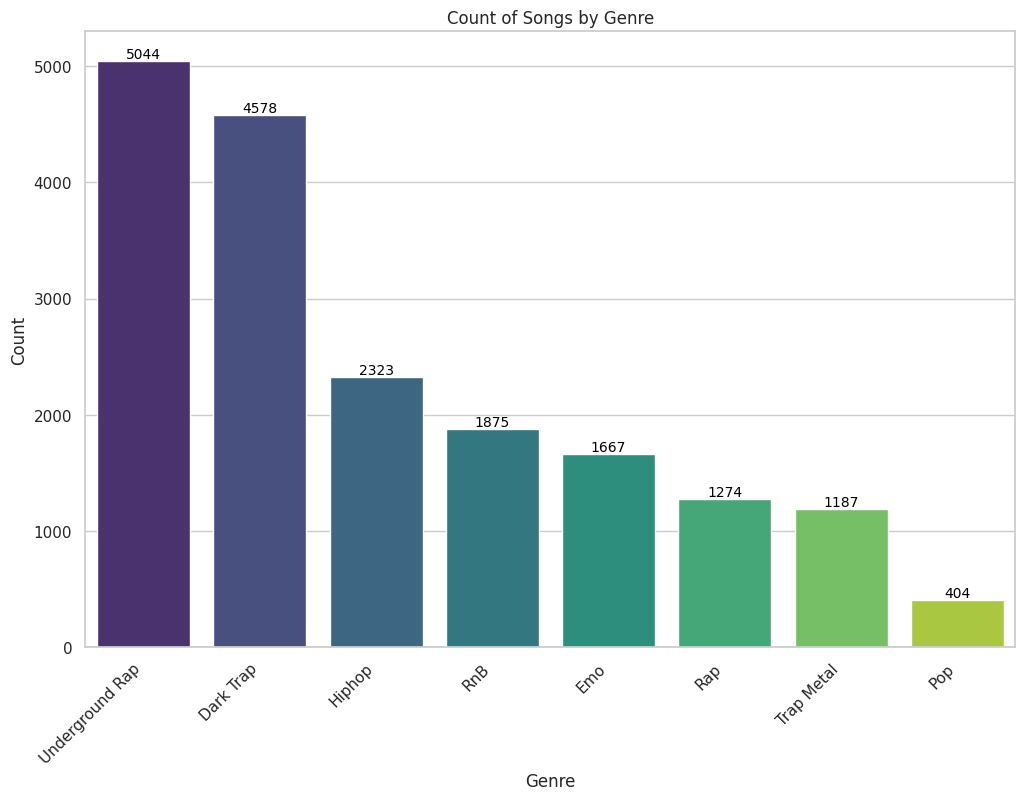

In [ ]:
# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create a count plot with count labels using sns.countplot
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index, palette='viridis')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Count of Songs by Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.show()

In [ ]:
import plotly.express as px

# Create a 3D scatter plot using Plotly Express
fig = px.scatter_3d(
    df,
    x='valence',
    y='energy',
    z='genre',
    color='genre',
    size_max=10,  # Set the maximum marker size
    opacity=0.7,  # Set marker opacity
    symbol='genre',  # Use different marker symbols for each genre
    width=800,
    height=600
)

# Customize layout
fig.update_layout(
    title='3D Scatter Plot of Valence, Energy, and Genre',
    scene=dict(
        zaxis=dict(showticklabels=False),
        xaxis_title='Valence',
        yaxis_title='Energy',
        zaxis_title='Genre',
        camera=dict(
            eye=dict(x=1.2, y=1.2, z=0.9),  # Set the initial view angle
        )
    )
)

# Show the plot
fig.show()

In [ ]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','uri','genre','song_name']
filtered_df = df[cols]
filtered_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,0.526,0.819,7,-6.728,1,0.2980,0.00206,0.000003,0.3360,0.5810,159.910,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &..."
21520,0.538,0.819,1,-6.780,1,0.4670,0.00854,0.000000,0.1310,0.2520,160.299,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21521,0.415,0.548,7,-8.563,1,0.2850,0.22400,0.000000,0.1220,0.5280,154.272,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21522,0.785,0.648,7,-6.907,1,0.2790,0.01570,0.001980,0.1000,0.5060,184.160,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live


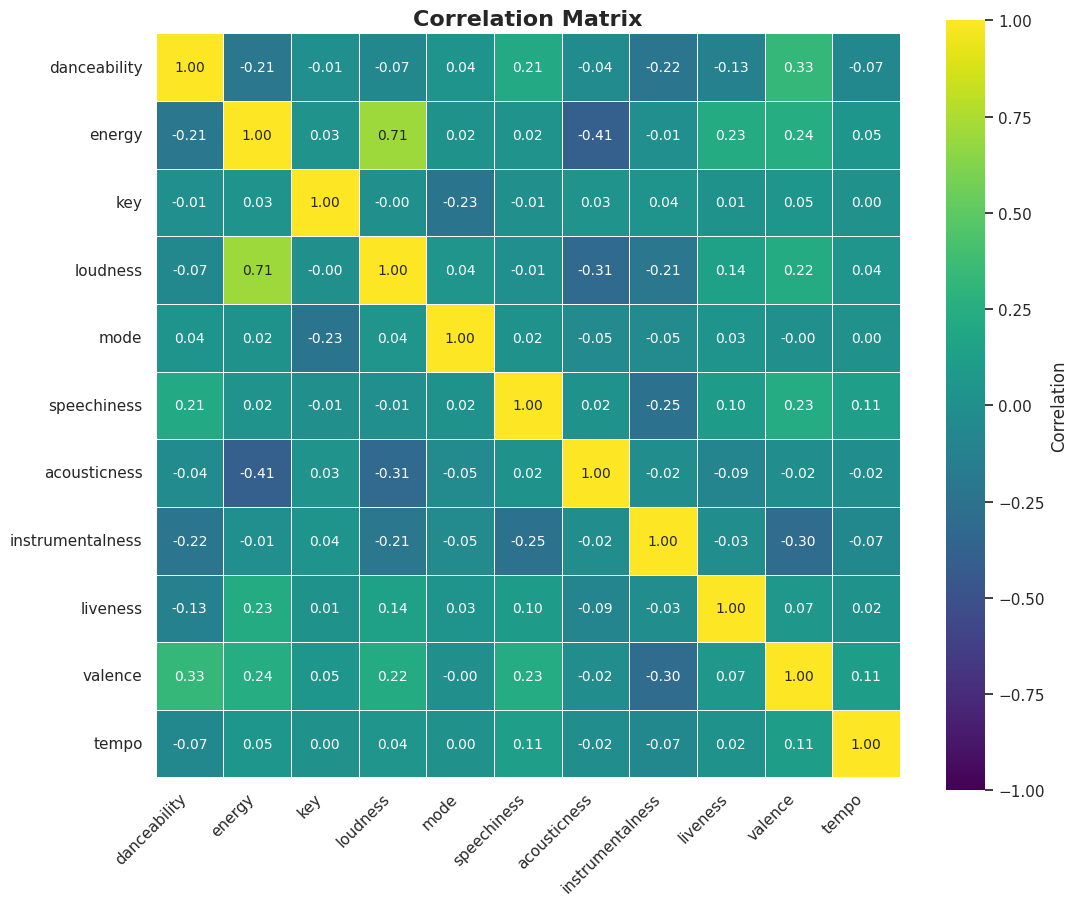

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style
sns.set(style="whitegrid")

# Selecting only numeric columns from the DataFrame
numeric_df = filtered_df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis')

# Plotting the Correlation Matrix
plt.figure(figsize=(12, 10))

# Use the 'coolwarm' colormap with the same color palette
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'}, annot_kws={"size": 10}, square=True)

plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability if needed
plt.yticks(rotation=0)
plt.show()

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18352 entries, 0 to 21523
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      18352 non-null  float64
 1   energy            18352 non-null  float64
 2   key               18352 non-null  int64  
 3   loudness          18352 non-null  float64
 4   mode              18352 non-null  int64  
 5   speechiness       18352 non-null  float64
 6   acousticness      18352 non-null  float64
 7   instrumentalness  18352 non-null  float64
 8   liveness          18352 non-null  float64
 9   valence           18352 non-null  float64
 10  tempo             18352 non-null  float64
 11  uri               18352 non-null  object 
 12  genre             18352 non-null  object 
 13  song_name         18352 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


In [ ]:
num_cols = [i for i in filtered_df.columns if filtered_df[i].dtype != 'object']
scaler = StandardScaler()

filtered_df[num_cols] = scaler.fit_transform(filtered_df[num_cols])
filtered_df

<ipython-input-13-f8591e928cb9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde
1,0.329285,-0.932612,0.773751,-0.050914,0.854028,-0.680405,1.095488,-0.360457,-0.508370,-1.257259,-1.285537,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology
2,1.137849,1.312372,-0.041444,0.774257,0.854028,-0.801664,-0.733239,-0.360440,1.175288,-1.619161,2.265699,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote
3,-1.170570,0.683777,-1.400101,0.798873,0.854028,-0.513053,-0.686482,-0.360457,-0.534884,-1.039861,1.193051,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,-0.861958,0.897050,0.502019,0.118369,0.854028,0.869727,-0.788686,-0.360443,0.936660,0.690793,0.260563,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &..."
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live


<ipython-input-14-466f898af708>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



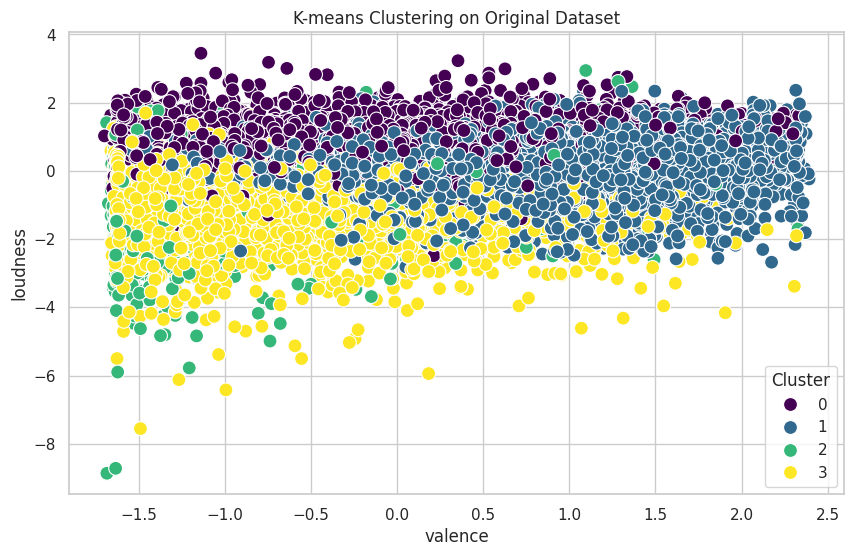

In [ ]:
#  K-Means Clustering without PCA

X = filtered_df.drop(['uri','genre','song_name'], axis=1)  # Drop non-numeric columns if any

# Choose the number of clusters (you mentioned 5 clusters)
n_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

filtered_df_no_pca = filtered_df
# Fit the KMeans model to your data
filtered_df_no_pca['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (you can use any relevant columns for visualization)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valence', y='loudness', hue='cluster', data=filtered_df_no_pca, palette='viridis', s=100)
plt.title('K-means Clustering on Original Dataset')
plt.xlabel('valence')
plt.ylabel('loudness')
plt.legend(title='Cluster')
plt.show()

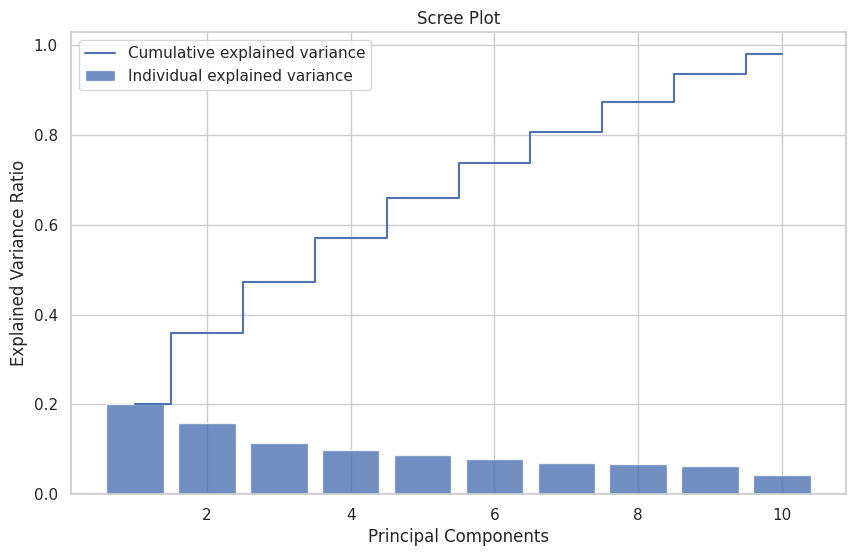

In [ ]:
# Perform PCA
n_components = 10  # Set a higher value initially
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(filtered_df[num_cols])

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.show()

In [ ]:
# 4. Perform PCA
n_components = 4  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(filtered_df[num_cols])
pca_df

array([[ 0.74729341,  1.23863762, -1.23011329, -0.19451128],
       [-1.5678939 , -0.0729223 , -0.32552114, -0.87823353],
       [ 1.44584131, -0.74249617, -0.74215366,  1.01669114],
       ...,
       [-0.44862149,  0.23462046, -0.07725616,  0.91485627],
       [ 0.58530391,  1.08221556, -0.21588203,  0.10470561],
       [ 1.18116072,  0.88273037,  0.73865583,  0.21430425]])

<ipython-input-17-54f1517c6c06>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



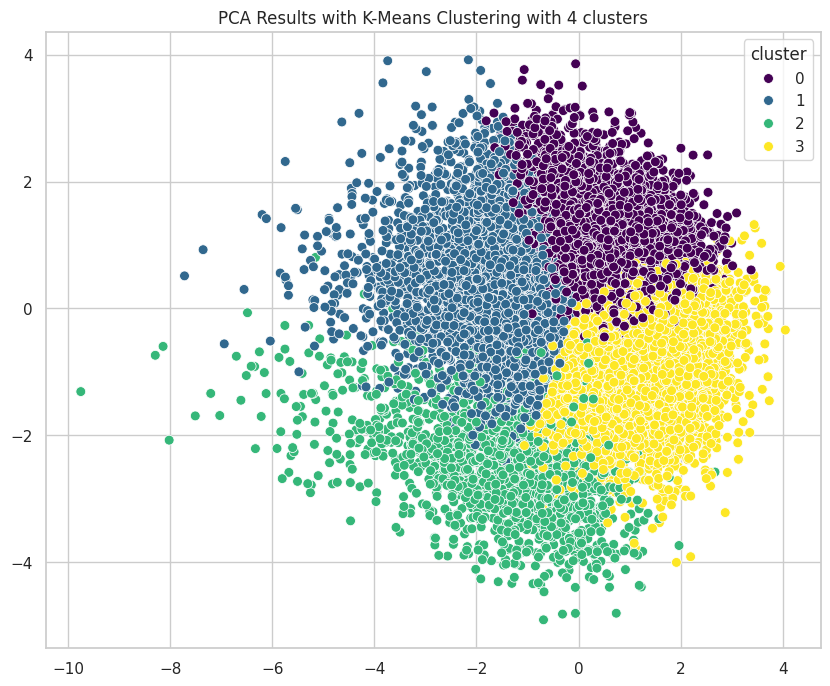

In [ ]:
# 5. K-Means Clustering on PCA Results
n_clusters = 4 # Number of clusters (adjust as needed)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
filtered_df_pca = filtered_df
filtered_df_pca['cluster'] = kmeans.fit_predict(pca_result)

# Visualize PCA Results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=filtered_df_pca['cluster'], palette='viridis', s=50)
plt.title(f'PCA Results with K-Means Clustering with {n_clusters} clusters')
plt.show()

In [ ]:
filtered_df_pca

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,0
1,0.329285,-0.932612,0.773751,-0.050914,0.854028,-0.680405,1.095488,-0.360457,-0.508370,-1.257259,-1.285537,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,1
2,1.137849,1.312372,-0.041444,0.774257,0.854028,-0.801664,-0.733239,-0.360440,1.175288,-1.619161,2.265699,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,3
3,-1.170570,0.683777,-1.400101,0.798873,0.854028,-0.513053,-0.686482,-0.360457,-0.534884,-1.039861,1.193051,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),3
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,-0.861958,0.897050,0.502019,0.118369,0.854028,0.869727,-0.788686,-0.360443,0.936660,0.690793,0.260563,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",3
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,3
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,1
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,0


In [ ]:
filtered_df_pca['cluster'].value_counts()

,count
cluster,
0,6654
3,5294
1,4760
2,1644


<ipython-input-20-adc5f26861b0>:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-20-adc5f26861b0>:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-20-adc5f26861b0>:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-20-adc5f26861b0>:14: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



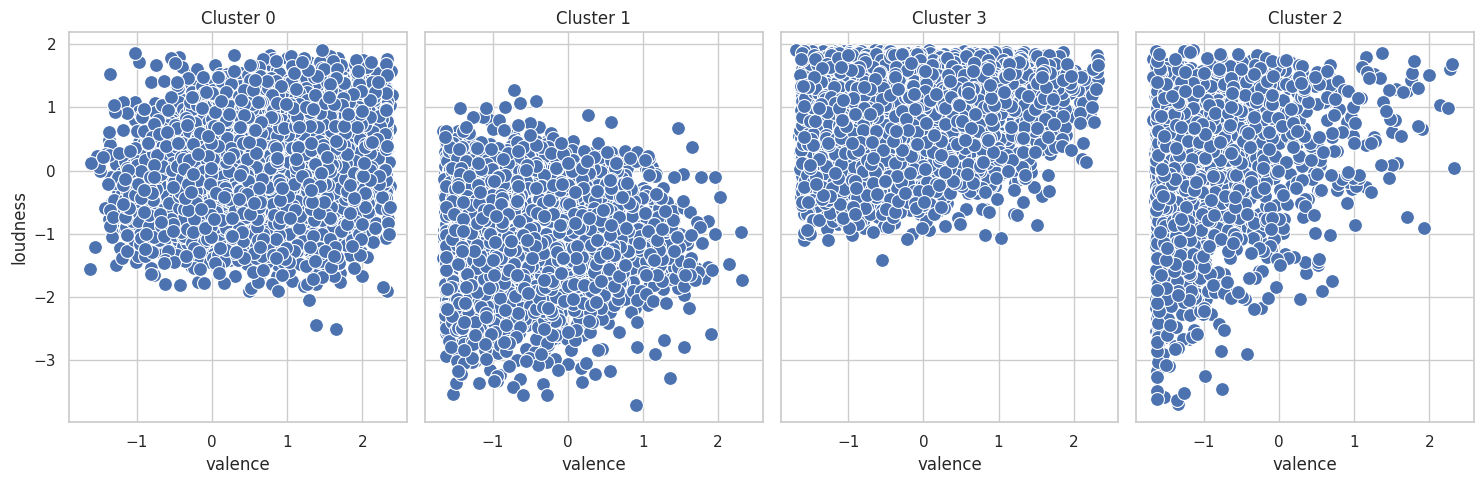

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a column named 'cluster' in your DataFrame
clusters = filtered_df_pca['cluster'].unique()

# Creating subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(15, 5), sharex=True, sharey=True)

# Plotting for each cluster
for i, cluster in enumerate(clusters):
    cluster_data = filtered_df_pca[filtered_df_pca['cluster'] == cluster]
    ax = axes[i]
    sns.scatterplot(x='valence', y='energy', data=cluster_data, palette='viridis', s=100, ax=ax)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('valence')
    ax.set_ylabel('loudness')
    ax.legend().set_visible(False)  # Hide legend for each subplot

plt.tight_layout()
plt.show()

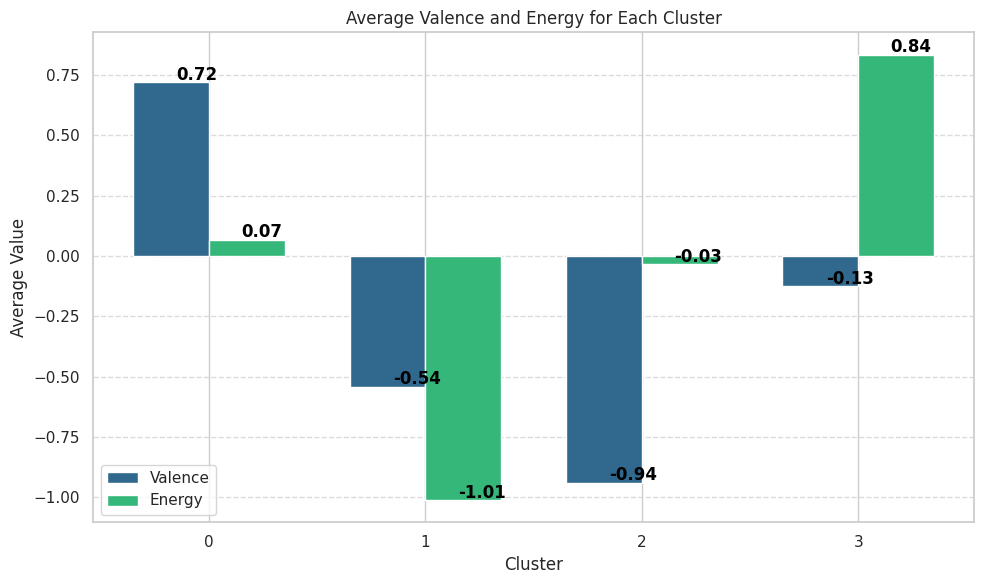

In [ ]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Group by 'clusters' and calculate the mean for 'valence' and 'energy'
cluster_means = filtered_df_pca.groupby('cluster')[['valence', 'energy']].mean().reset_index()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', 2)

# Plotting the average 'valence' and 'energy' for each cluster in grouped bars
bar_width = 0.35
index = cluster_means['cluster']

plt.figure(figsize=(10, 6))

plt.bar(index - bar_width/2, cluster_means['valence'], bar_width, color=colors[0], label='Valence')
plt.bar(index + bar_width/2, cluster_means['energy'], bar_width, color=colors[1], label='Energy')

# Displaying values on top of each bar
for i, valence, energy in zip(index, cluster_means['valence'], cluster_means['energy']):
    plt.text(i - 0.15, valence + 0.01, f'{valence:.2f}', color='black', fontweight='bold')
    plt.text(i + 0.15, energy + 0.01, f'{energy:.2f}', color='black', fontweight='bold')

plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.title('Average Valence and Energy for Each Cluster')
plt.xticks(index, cluster_means['cluster'])
plt.legend()

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 0, 'Sad', np.nan)
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 1, 'Calm', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 2, 'Angry', filtered_df_pca['mood'])
filtered_df_pca['mood'] = np.where(filtered_df_pca['cluster'] == 3, 'Happy', filtered_df_pca['mood'])

filtered_df_pca

<ipython-input-22-4e9ee405b57a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-4e9ee405b57a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-4e9ee405b57a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-4e9ee40

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster,mood
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,0,Sad
1,0.329285,-0.932612,0.773751,-0.050914,0.854028,-0.680405,1.095488,-0.360457,-0.508370,-1.257259,-1.285537,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,Dark Trap,Pathology,1,Calm
2,1.137849,1.312372,-0.041444,0.774257,0.854028,-0.801664,-0.733239,-0.360440,1.175288,-1.619161,2.265699,spotify:track:0vSWgAlfpye0WCGeNmuNhy,Dark Trap,Symbiote,3,Happy
3,-1.170570,0.683777,-1.400101,0.798873,0.854028,-0.513053,-0.686482,-0.360457,-0.534884,-1.039861,1.193051,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),3,Happy
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,0,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,-0.861958,0.897050,0.502019,0.118369,0.854028,0.869727,-0.788686,-0.360443,0.936660,0.690793,0.260563,spotify:track:54v6Kv41W8AKToCb14PmJD,Hiphop,"H20 (feat. Pharoahe Monch, Rakaa Iriscience, &...",3,Happy
21520,-0.787891,0.897050,-1.128370,0.100834,0.854028,2.068136,-0.758081,-0.360457,-0.422198,-0.711634,0.273978,spotify:track:4YuGxSdxyL6fRD7uchn9dI,Hiphop,Daddy's Girl,3,Happy
21521,-1.547077,-0.623927,0.502019,-0.500424,0.854028,0.777541,0.259525,-0.360457,-0.481855,0.464870,0.066119,spotify:track:034dSXepspHaYFW7rZZx1d,Hiphop,'94,1,Calm
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,0,Sad


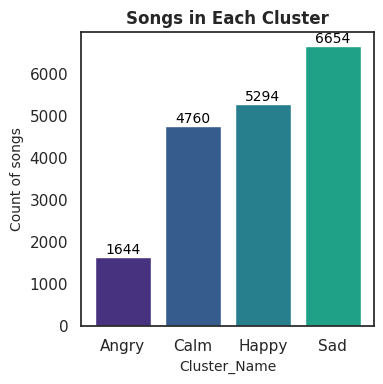

In [ ]:
sns.set(style="white")

# Get value counts of each unique value in 'cluster' column
cluster_counts = filtered_df_pca['mood'].value_counts().sort_values()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis')

# Plotting a bar graph for the counts of each unique value in 'cluster' column
plt.figure(figsize=(4, 4))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors)

plt.title('Songs in Each Cluster', fontsize=12, fontweight='bold')
plt.xlabel('Cluster_Name', fontsize=10)
plt.ylabel('Count of songs', fontsize=10)

# Display count values above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(cluster_counts.index)
plt.tight_layout()
plt.show()

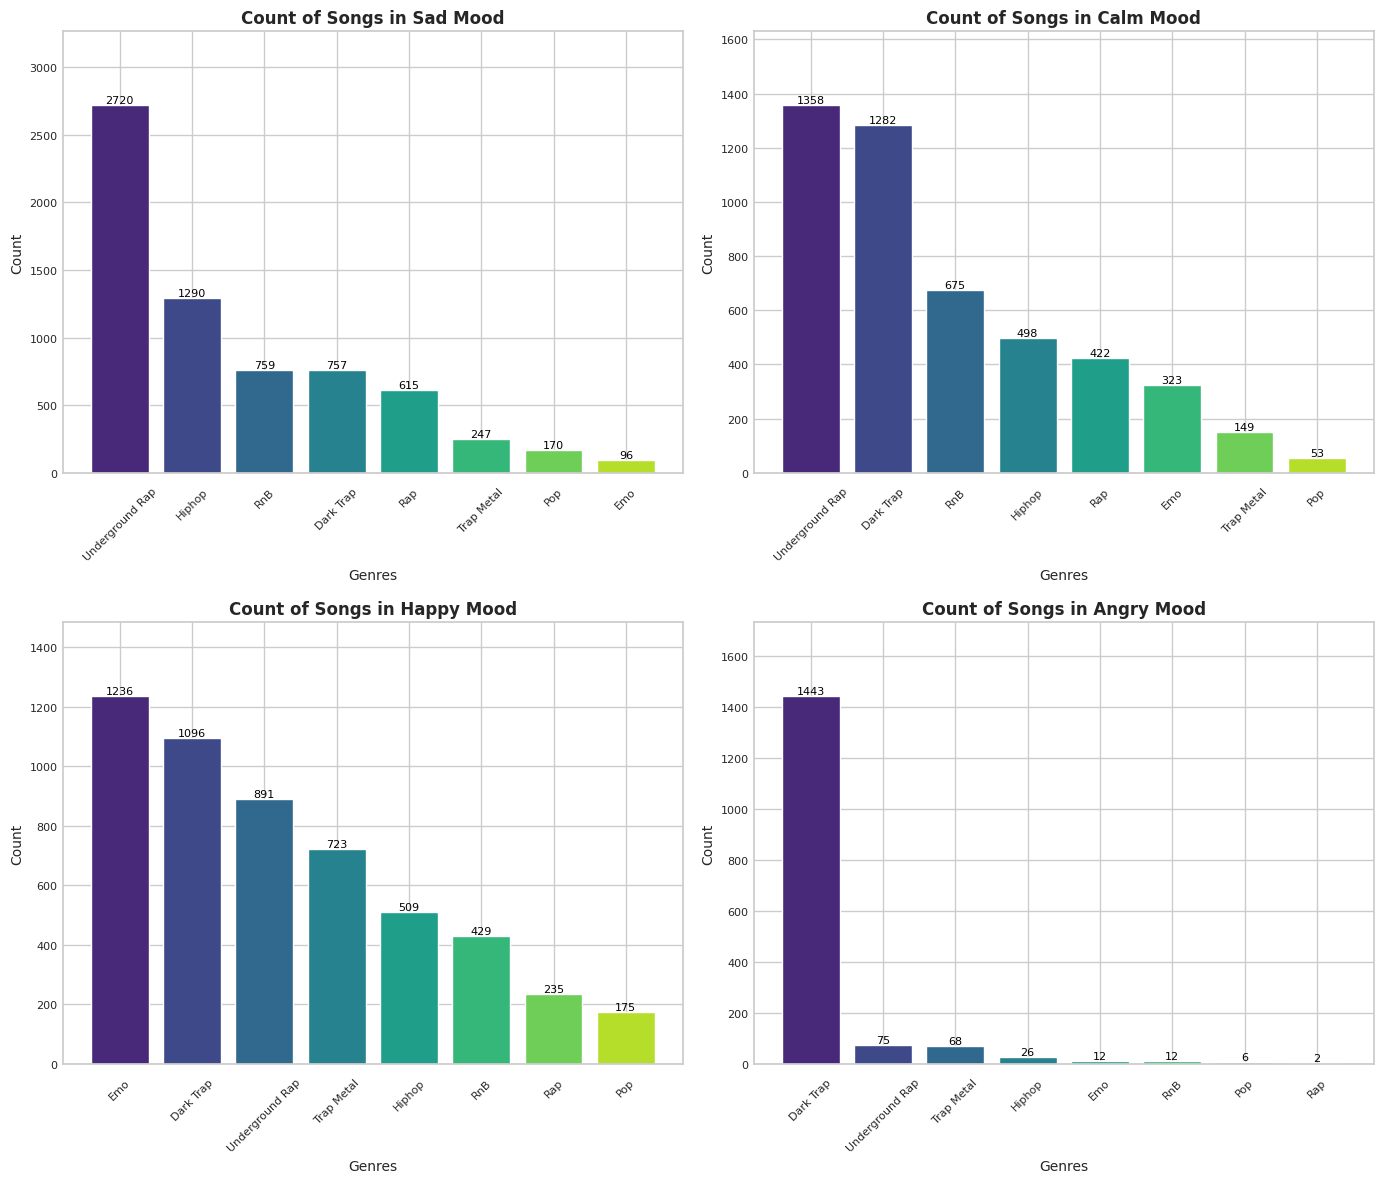

In [ ]:
sns.set(style="whitegrid")

# Get unique moods and genres
unique_moods = filtered_df_pca['mood'].unique()
unique_genres = filtered_df_pca['genre'].unique()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', len(unique_genres))

# Create subplots for each mood
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

for i, mood in enumerate(unique_moods):
    row = i // 2
    col = i % 2

    mood_data = filtered_df_pca[filtered_df_pca['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()

    # Plotting bar graph for the counts of each unique value in 'genre' column
    bars = axes[row, col].bar(genre_counts.index, genre_counts.values, color=colors)

    axes[row, col].set_title(f'Count of Songs in {mood} Mood', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Genres', fontsize=10)
    axes[row, col].set_ylabel('Count', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=8)
    axes[row, col].tick_params(axis='y', labelsize=8)
    axes[row, col].tick_params(axis='y', which='both', length=0)
    axes[row, col].set_ylim(0, genre_counts.max() * 1.2)

    # Display count values above each bar
    for bar in bars:
        yval = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8, color='black')

# Adjust layout
plt.tight_layout()
plt.show()

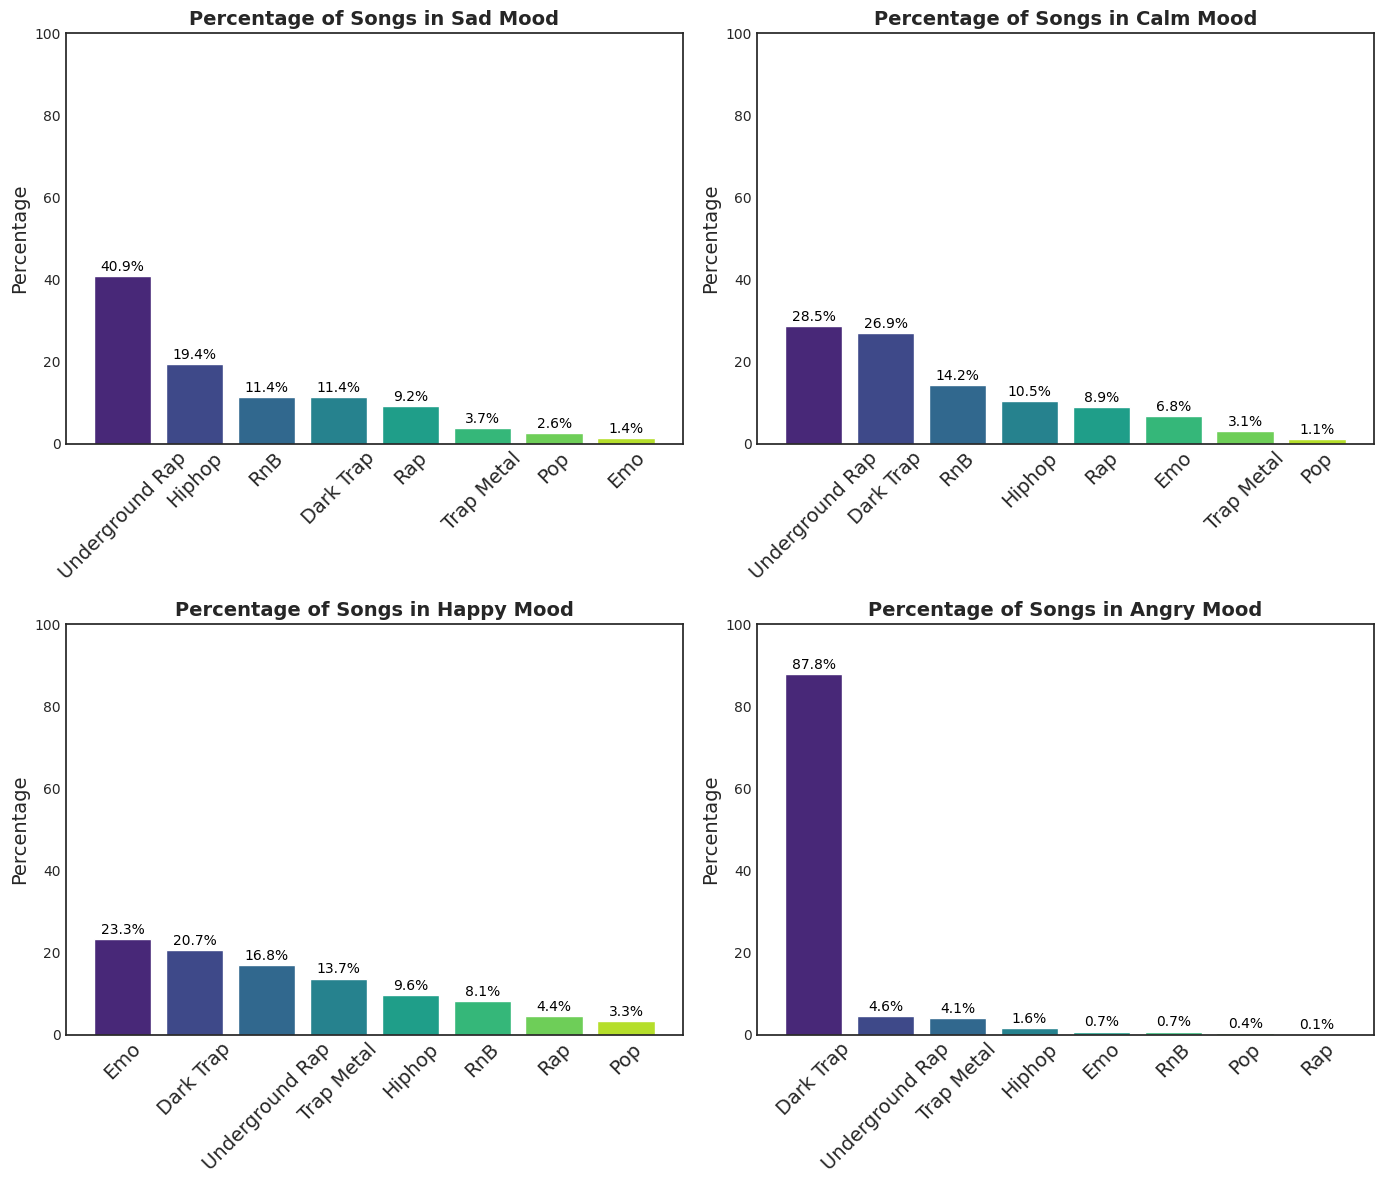

In [ ]:
sns.set(style="white")

# Get unique moods and genres
unique_moods = filtered_df_pca['mood'].unique()
unique_genres = filtered_df_pca['genre'].unique()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', len(unique_genres))

# Create subplots for each mood
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

for i, mood in enumerate(unique_moods):
    row = i // 2
    col = i % 2

    mood_data = filtered_df_pca[filtered_df_pca['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()

    # Plotting bar graph for the counts of each unique value in 'genre' column
    bars = axes[row, col].bar(genre_counts.index, genre_counts.values / genre_counts.sum() * 100, color=colors)

    axes[row, col].set_title(f'Percentage of Songs in {mood} Mood', fontsize=14, fontweight='bold')
    #axes[row, col].set_xlabel('Genres', fontsize=12)
    axes[row, col].set_ylabel('Percentage', fontsize=14)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=14)
    axes[row, col].tick_params(axis='y', labelsize=10)
    axes[row, col].tick_params(axis='both', which='both', length=0)  # Remove ticks
    axes[row, col].set_ylim(0, 100)

    # Display percentages above each bar
    for bar in bars:
        yval = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
detected_mood = np.random.choice(['Happy','Sad','Angry','Calm'])

# Filter DataFrame based on detected mood
filtered_by_mood = filtered_df_pca[filtered_df_pca['mood'] == detected_mood]

# Select 5 random songs from the filtered DataFrame
random_songs = filtered_by_mood.sample(5)['song_name']

print("Detected mood is:", detected_mood)
print("Random songs based on detected mood:")
print(random_songs)

Detected mood is: Sad
Random songs based on detected mood:
7533                          Ms. Jackson
5810                           Good Drank
16026               Wanna Get To Know You
15483                          Paramedic!
6498     When I Get It (feat. Young Thug)
Name: song_name, dtype: object


In [ ]:
filtered_by_mood = filtered_by_mood.drop_duplicates(subset=['song_name'])
filtered_by_mood

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri,genre,song_name,cluster,mood
0,1.020577,0.868988,-0.856638,-0.096101,0.854028,1.734850,-0.515983,-0.302673,-0.921993,-0.127645,0.159685,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,Dark Trap,Mercury: Retrograde,0,Sad
4,0.816892,-0.197380,-0.856638,-0.198615,0.854028,0.834271,0.226465,-0.360457,-0.190198,0.733419,-0.150604,spotify:track:4jCeguq9rMTlbMmPHuO7S3,Dark Trap,Venom,0,Sad
9,1.403256,1.390947,1.588945,-1.121915,0.854028,1.359018,-0.080527,-0.226346,2.408203,-0.498499,1.641189,spotify:track:2ggqfj97qyiORmXoVFzP5j,Dark Trap,Andromeda,0,Sad
15,-0.300284,-0.663214,0.230288,1.000192,0.854028,4.287675,-0.208047,-0.360457,1.155403,0.047126,0.263529,spotify:track:4Ag89Y7qSUrpxcgRtSzSam,Dark Trap,D(R)Own,0,Sad
18,0.903304,0.863375,1.317214,0.504483,-1.170922,-0.545673,-0.332260,-0.359811,-0.788095,-0.302415,-0.837675,spotify:track:3KJrwOuqiEwHq6QTreZT61,Dark Trap,Io sono qui,0,Sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21515,0.946510,-0.231055,1.588945,0.315304,-1.170922,-0.052127,1.374142,0.277758,-0.594541,1.841720,1.248853,spotify:track:1t2ZxgMhUmOprCILh0UjlX,Hiphop,Life of a Sinner,0,Sad
21516,0.903304,-0.006556,0.230288,0.082624,0.854028,-0.130130,-0.769747,-0.360457,-0.402312,0.405192,1.366526,spotify:track:5zEoohLO20ofIBg0fzPqhQ,Hiphop,Get $ Paid,0,Sad
21517,0.329285,-1.207623,-0.313175,-0.261337,-1.170922,0.103879,-0.541487,-0.360457,-0.163684,1.300358,0.947220,spotify:track:6Nv73zhgxCrWigqzGWCfNA,Hiphop,I'm Sorry Baby (Remix) [feat. Wadz & Talkbox P...,0,Sad
21522,0.736653,-0.062681,0.502019,0.058007,0.854028,0.734994,-0.724265,-0.351919,-0.627684,0.371090,1.096898,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,Hiphop,Born 2 Live,0,Sad


In [ ]:
import pandas as pd
import ipywidgets as widgets
from sklearn.metrics.pairwise import cosine_similarity


# Initialize top_recommendation_uri as a global variable
top_recommendation_uri = None

# Create a dropdown widget for song selection
song_dropdown = widgets.Dropdown(
    options=random_songs,
    description='Select a song:'
)

# Display the dropdown widget
display(song_dropdown)

# Function to handle song selection
def on_song_selection(change):
    global top_recommendation_uri  # Declare top_recommendation_uri as a global variable

    selected_song = change.new
    print(f"You selected: {selected_song}")

    # Check if the user-selected song is in the filtered DataFrame
    if selected_song in filtered_by_mood['song_name'].values:
        selected_song_features = filtered_by_mood.loc[filtered_by_mood['song_name'] == selected_song, ['energy', 'valence']].values.flatten()
        all_songs_features = filtered_by_mood[['energy', 'valence']].values

        similarities = cosine_similarity([selected_song_features], all_songs_features)
        result_df = pd.DataFrame({'song_name': filtered_by_mood['song_name'], 'similarity': similarities.flatten(),'uri':filtered_by_mood['uri']})
        result_df = result_df.sort_values(by='similarity', ascending=False).reset_index(drop=True)
        result_df = result_df[result_df['song_name'] != selected_song]
        top_3_recommendations = result_df.head(3)

        print("Top 3 recommendations based on energy and valence:")
        print(top_3_recommendations[['song_name', 'similarity']])

        # Fetching URI of the top recommendation
        top_recommendation_uri = top_3_recommendations.loc[result_df.iloc[0].name, 'uri']
        print(f"URI of top recommendation: {top_recommendation_uri}")
# Registering the function to observe changes in the dropdown value
song_dropdown.observe(on_song_selection, names='value')

# Now you can access top_recommendation_uri outside the function
print(top_recommendation_uri)

Dropdown(description='Select a song:', options=('Ms. Jackson', 'Good Drank', 'Wanna Get To Know You', 'Paramed…

None
You selected: Good Drank
Top 3 recommendations based on energy and valence:
                   song_name  similarity
1     Incarcerated Scarfaces    1.000000
2                     No L's    0.999999
3  Did it Again (Jay Critch)    0.999993
URI of top recommendation: spotify:track:3SL3GG9Bs7m1s9aqhjCeIa
You selected: Ms. Jackson
Top 3 recommendations based on energy and valence:
                                           song_name  similarity
1  The Adventures of Moon Man & Slim Shady (with ...         1.0
2                                               Bull         1.0
3                           Never Call U B**** Again         1.0
URI of top recommendation: spotify:track:38iBrrbbXyWaSPkmuDNgjZ


In [ ]:
import spotipy
import os
import time
from spotipy.oauth2 import SpotifyOAuth

os.system("open /Applications/Spotify.app")
time.sleep(4)

# Replace 'YOUR_CLIENT_ID', 'YOUR_CLIENT_SECRET', and 'YOUR_REDIRECT_URI' with your actual Spotify credentials
client_id = 'e9c2ca587e9a49d68e0e7239facaf237'
client_secret = '92ab877118ba4e58859d6747f64e30cd'
redirect_uri = 'http://localhost:8888/callback'  # Make sure this matches your Spotify app settings

# Set up the Spotify OAuth object with user authentication
scope = 'user-modify-playback-state user-read-playback-state'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri, scope=scope))

# Get the list of user's available devices
devices = sp.devices()
device_id = None

# Check if there are available devices
if devices['devices']:
    device_id = devices['devices'][0]['id']  # Use the first available device

# Start playback of the specified track with the selected device
sp.start_playback(device_id=device_id, uris=[top_recommendation_uri])

ModuleNotFoundError: No module named 'spotipy'